In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
start = datetime(2006, 1, 1)
end = datetime(2017, 1, 1)

BAC = data.DataReader("BAC", 'stooq', start, end)
C = data.DataReader("C", 'stooq', start, end)
GS = data.DataReader("GS", 'stooq', start, end)
JPM = data.DataReader("JPM", 'stooq', start, end)
MS = data.DataReader("MS", 'stooq', start, end)
WFC = data.DataReader("WFC", 'stooq', start, end)

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [3]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.7180  39.9344  39.0661  39.8533  1.925141e+07  410.185   
2006-01-04   39.7862  39.9916  39.3189  39.4296  2.097767e+07  409.037   
2006-01-05   39.4296  39.6430  39.2113  39.4820  1.751074e+07  405.482   
2006-01-06   39.6153  39.7082  39.2370  39.4208  1.487831e+07  409.185   
2006-01-09   39.5481  39.7605  39.2439  39.4474  1.845131e+07  406.828   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   413.344  402.719  412.611  1.836840e+06  ...  37.8570  38.7278   
2006-01-04   411.027  404.719  404.987  2.235056e+06  ...  38.8704  39.2548   
2006-01-05   408.334  405.155  406.977  1.356199e+06  ...  38.6386  38.7991   
2006-01-06   409.324  403.481  406.977  1.636869e+06  ...  38.9170  38.9665   
2006-01-09   407.997  404.303  405.066  2.007837e+06  ...  38.8199  39.2617   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.5668  38.6069  6.741014e+06  22.8895  23.1626  22.6005   
2006-01-04   38.6386  38.6386  1.000157e+07  23.0305  23.0454  22.7137   
2006-01-05   38.4138  38.7436  7.243742e+06  22.8150  22.8517  22.6759   
2006-01-06   38.4395  38.7833  8.637572e+06  22.8766  23.0116  22.7375   
2006-01-09   38.8140  39.1884  5.195856e+06  22.9451  23.0454  22.8517   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   23.1060  1.520929e+07  
2006-01-04   22.8378  1.500717e+07  
2006-01-05   22.8150  1.398718e+07  
2006-01-06   22.9451  1.160232e+07  
2006-01-09   22.9451  7.758446e+06  

[5 rows x 30 columns]

In [4]:
#Explorative Datenanalyse
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()
returns = pd.DataFrame()

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010631,-0.018477,-0.013699,-0.014308,0.000821,-0.011607
2006-01-05,0.001329,0.004914,-0.000362,0.003130,0.002717,-0.000998
2006-01-06,-0.001550,0.000000,0.013989,0.007064,0.001025,0.005702
2006-01-09,0.000675,-0.004696,0.012032,0.016240,0.010445,0.000000


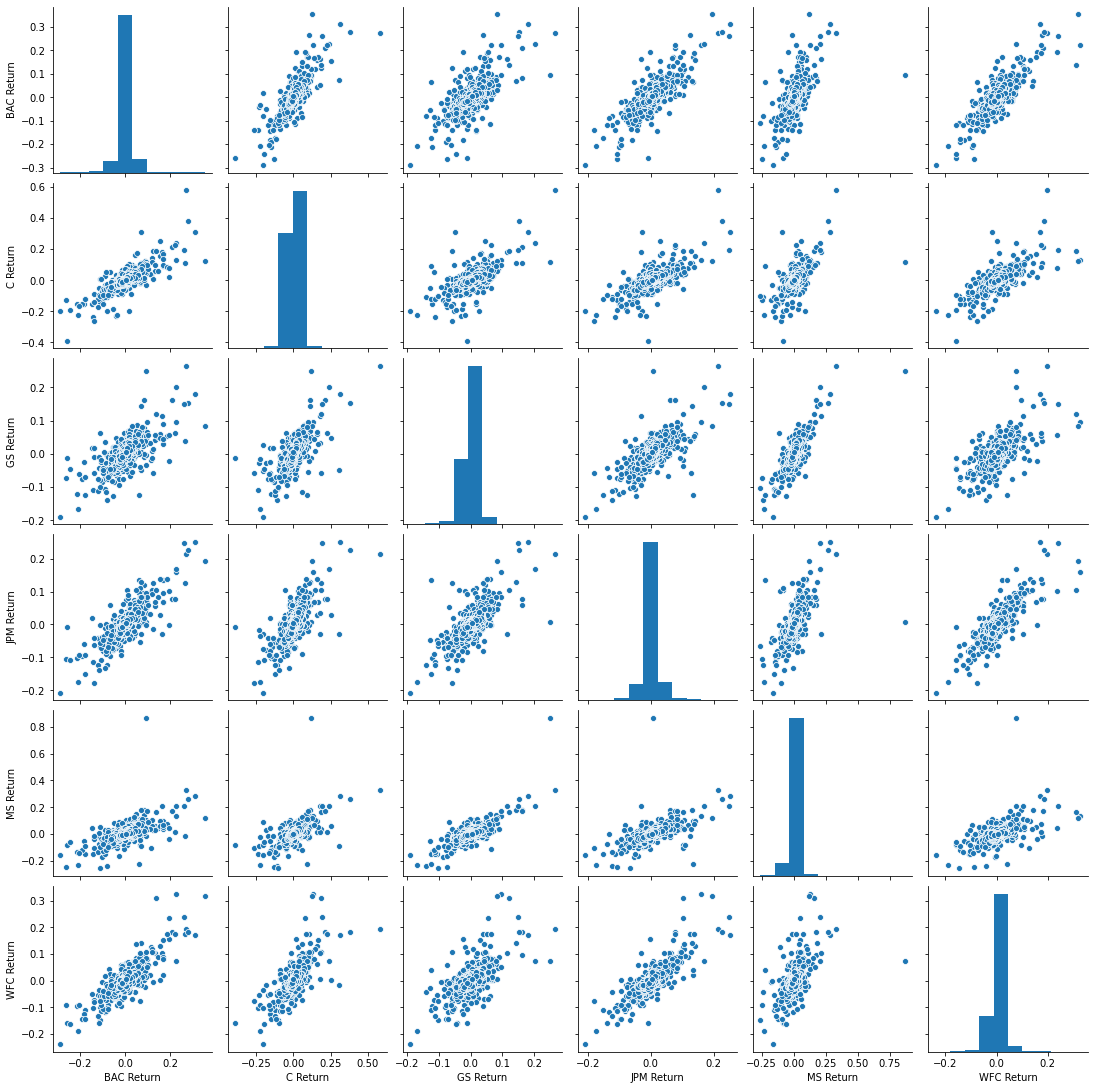

In [5]:
import seaborn as sns
sns.pairplot(returns[1:])

In [6]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [7]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [8]:
returns.std()

BAC Return    0.035430
C Return      0.037307
GS Return     0.024720
JPM Return    0.026792
MS Return     0.036479
WFC Return    0.029164
dtype: float64

In [9]:
returns.loc['2016-01-01':'2016-12-31'].head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2016-01-04,-0.023639,-0.011968,-0.017201,-0.030079,-0.010396,-0.026689
2016-01-05,0.000000,-0.005285,-0.017125,0.001699,-0.006354,-0.000297
2016-01-06,-0.021461,-0.014604,-0.024599,-0.014408,-0.024904,-0.019171
2016-01-07,-0.035914,-0.051042,-0.030666,-0.040415,-0.049958,-0.028524
2016-01-08,-0.019464,-0.029994,-0.004073,-0.022487,-0.020627,-0.016687


In [10]:
returns.loc['2016-01-01':'2016-12-31'].std()

BAC Return    0.020282
C Return      0.020023
GS Return     0.016913
JPM Return    0.015536
MS Return     0.020524
WFC Return    0.014976
dtype: float64

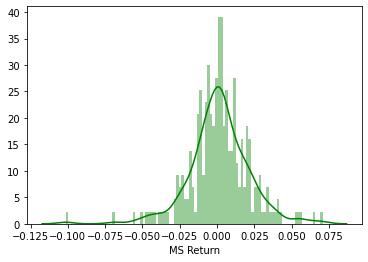

In [11]:
sns.distplot(returns.loc['2016']['MS Return'],color='green',bins=100)

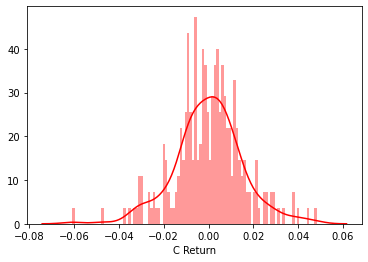

In [12]:
sns.distplot(returns.loc['2015']['C Return'],color='red',bins=100)

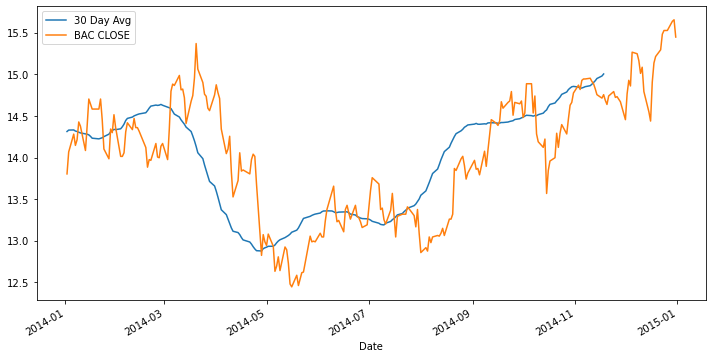

In [13]:
#Lass uns den laufenden Durschnitt im Jahre 2014 berechnen
plt.figure(figsize=(12,6))
BAC['Close'].loc['2014'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2014'].plot(label='BAC CLOSE')
plt.legend()

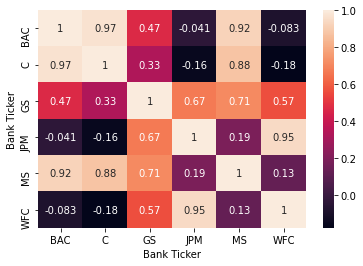

In [14]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

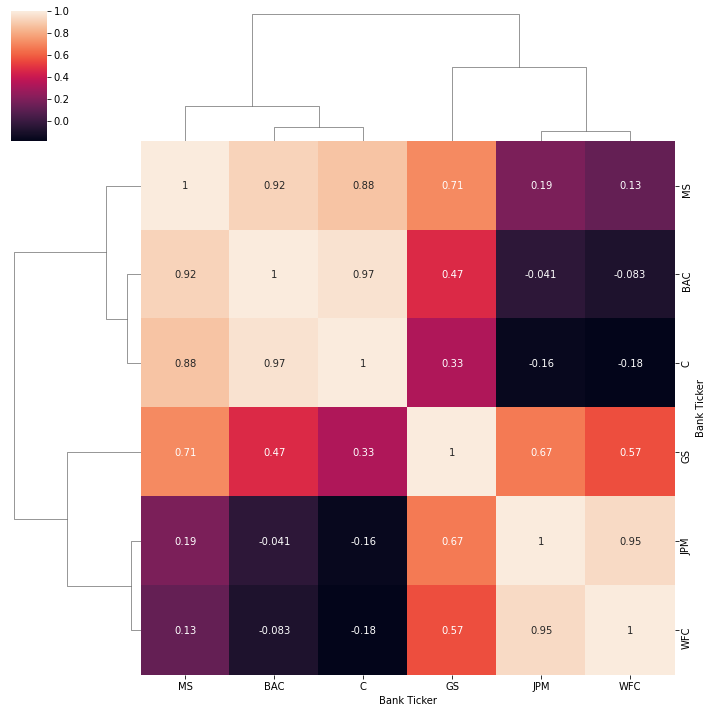

In [18]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)